# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [401, 12, 414]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,27167,2801,2128,13223,92,1902
1,31714,12319,11757,287,3881,2931
2,5969,1990,3417,5679,1135,290


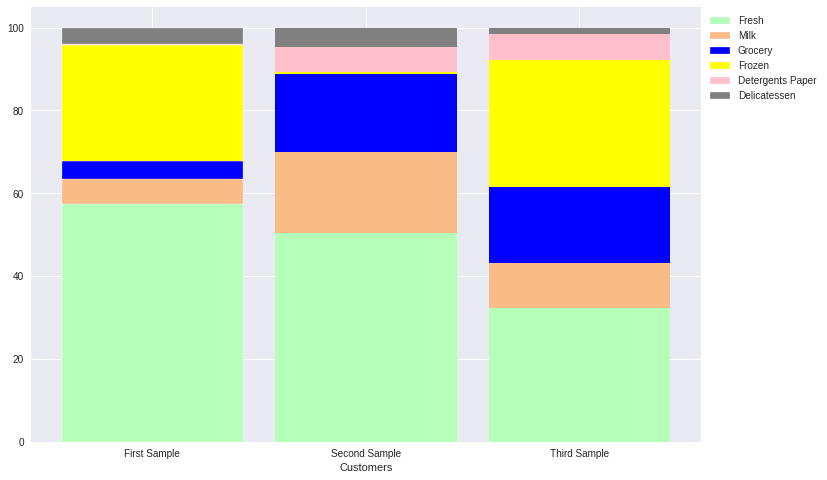

In [4]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# From raw value to percentage
totals = [a+b+c+d+e+f for a,b,c,d,e,f in zip(samples['Fresh'], samples['Milk'], samples['Grocery'],
                                 samples['Frozen'], samples['Detergents_Paper'], samples['Delicatessen'])]
greenBars = [i / j * 100 for i,j in zip(samples['Fresh'], totals)]
orangeBars = [i / j * 100 for i,j in zip(samples['Milk'], totals)]
blueBars = [i / j * 100 for i,j in zip(samples['Grocery'], totals)]
yellowBars = [i / j * 100 for i,j in zip(samples['Frozen'], totals)]
pinkBars = [i / j * 100 for i,j in zip(samples['Detergents_Paper'], totals)]
grayBars = [i / j * 100 for i,j in zip(samples['Delicatessen'], totals)]
 
# plot
r = [0,1,2]
barWidth = 0.85
names = ('First Sample','Second Sample','Third Sample')
plt.figure(figsize=(12,8))

plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label='Fresh')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label='Milk')
plt.bar(r, blueBars, bottom=[a+b for a,b in zip(greenBars, orangeBars)], color='#0000ff', edgecolor='white', width=barWidth, label='Grocery')
plt.bar(r, yellowBars, bottom=[a+b+c for a,b,c in zip(greenBars, orangeBars, blueBars)], color='#ffff00', edgecolor='white', width=barWidth, label='Frozen')
plt.bar(r, pinkBars, bottom=[a+b+c+d for a,b,c,d in zip(greenBars, orangeBars, blueBars, yellowBars)], color='#ffc0cb', edgecolor='white', width=barWidth, label='Detergents Paper')
plt.bar(r, grayBars, bottom=[a+b+c+d+e for a,b,c,d,e in zip(greenBars, orangeBars, blueBars, yellowBars, pinkBars)], color='#808080', edgecolor='white', width=barWidth, label='Delicatessen')
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Customers")

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

#### FIRST SAMPLE
			
| Fresh | Milk   | Grocery | Frozen   | Detergent_Papers | Delicatessen|
|------|------|------|------|------|------|
|   27167  | 2801|   2128  | 13223|  92  | 1902|

Looking at the first sample, this customer seems to have purhcased a lot of fresh foods and frozen foods during the year. The other goods were all below average with the exception of Delicatessen which is also above average. My best guess will be special event food stand as such events are not permanent establishments so no need for much detergents for clean-ups and also fresh and frozen foods will have to be sold at ones.

#### SECOND SAMPLE

| Fresh | Milk   | Grocery | Frozen   | Detergent_Papers | Delicatessen|
|------|------|------|------|------|------|
|   31714  | 12319|   11757  | 287|  3881  | 2931|

This customer purchased less frozen food but the rest are above average. My best guess would be a grocery shop or establishment like a super market which focuses more on foods like milk, eggs, vegetables and delis.

#### THIRD SAMPLE

| Fresh | Milk   | Grocery | Frozen   | Detergent_Papers | Delicatessen|
|------|------|------|------|------|------|
|   5969  | 1990|   3417  | 5679|  1135  | 290|

This customer seems to have purchased a little bit of everything. The only item above average is the Frozen foods. We could be looking at a fast food restaurant thats sells foods and very small amounts of delis.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

target_features = [*data.columns.values]

for target in target_features:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    y = data[target]
    new_data = data.drop([target], axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("The score is {} with {} as target variable".format(score, target))

/home/sambeth/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The score is -0.421422560818858 with Fresh as target variable
The score is 0.1329985491659964 with Milk as target variable
The score is 0.6343138607019465 with Grocery as target variable
The score is 0.2739479973315926 with Frozen as target variable
The score is 0.7294677811753572 with Detergents_Paper as target variable
The score is -11.814702636805933 with Delicatessen as target variable


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Honestly, I attempted to predict the Frozen feature but I was not satisfied with the score I got so I decided to predict all the other features and these are the results.

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|----|----|----|----|----|----|----|
| score | -0.4214 | 0.1329 | 0.6343 | 0.2739 | 0.7294 | -11.8147 |

According to the score computed for the Frozen feature, it's not necessary for identifying the spending habits of customers. Grocery and Detergent_Papers features have a really good score which gives us the hint they may be necessary for identifying the spending habits of customers. Fresh and Delicatessen on the otherhand fell off the model. Personally, I feel the Frozen and Milk features should be better identifiers.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/sambeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd9402da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd2ce8160>]], dtype=object)

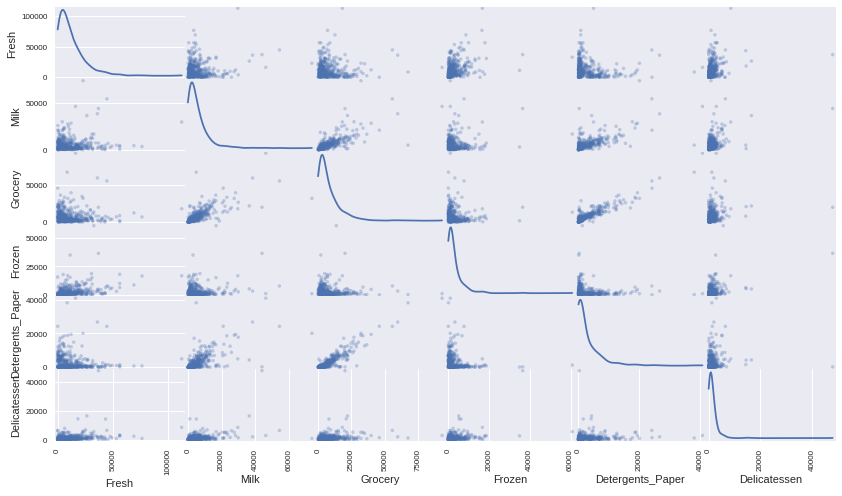

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

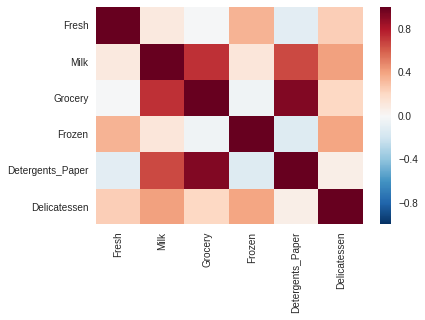

In [7]:
sns.heatmap(data.corr())

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

It appears all the features have their data points positively skewed (i.e. right skewness) with most the data points spread far to the right of the median. The data is not normally distributed but it can be observed that Grocery and Detergents_Paper features are higly correlated in the positive direction. My initial assumption still holds that the `Frozen` feature could be a good identifier for customer habits but I'm not too sure about the Milk feature. I think from the heatmap diagram, I'd say the `Fresh` feature could be a good identifier too.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/sambeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32359452b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f322fc2b278>]], dtype=object)

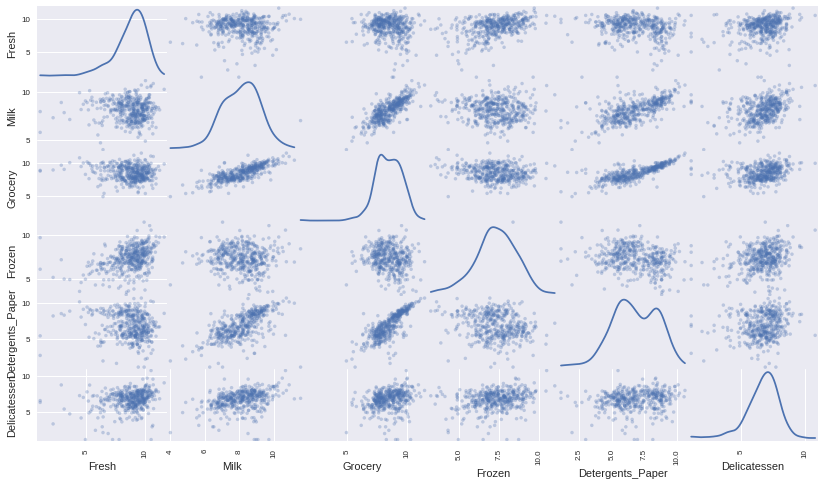

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.209758,7.937732,7.662938,9.489713,4.521789,7.550661
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,8.694335,7.595890,8.136518,8.644530,7.034388,5.669881


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
feature_outlier_index = {}
remove_data = set()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    # OPTIONAL: Select the indices for data points you wish to remove
    feature_outlier_index[str(feature)]={"index": [*log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index]}
    
    remove_data.update([*log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index])


outlier_index = set()
outlier_features = list(log_data.keys())
for outlier in outlier_features:
    for feature in feature_outlier_index.keys():
        if outlier != feature:
            first = set(*feature_outlier_index[outlier].values())
            second = set(*feature_outlier_index[feature].values())
            s = first.intersection(second)
            if len(s) >= 1:
                print("{} outlier appeared in {} and {} features".format(s, outlier, feature), '\n')
                outlier_index.update(s)
        else:
            continue     

# Remove the outliers, if any were specified
outliers = list(remove_data)
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


{65} outlier appeared in Fresh and Frozen features 

{128, 66} outlier appeared in Fresh and Delicatessen features 

{154} outlier appeared in Milk and Grocery features 

{154} outlier appeared in Milk and Delicatessen features 

{154} outlier appeared in Grocery and Milk features 

{75} outlier appeared in Grocery and Detergents_Paper features 

{154} outlier appeared in Grocery and Delicatessen features 

{65} outlier appeared in Frozen and Fresh features 

{75} outlier appeared in Detergents_Paper and Grocery features 

{128, 66} outlier appeared in Delicatessen and Fresh features 

{154} outlier appeared in Delicatessen and Milk features 

{154} outlier appeared in Delicatessen and Grocery features 



### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

|     | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|-------|-------|-------|-------|-------|-------|-------|
| 65 | Yes |  |  | Yes |  |  |
| 66 | Yes |  |  |  |  | Yes |
| 75 |  |  | Yes |  | Yes |  |
| 128 | Yes |  |  |  |  | Yes |
| 154 |  | Yes | Yes |  |  | Yes |

From the above table there are 5 rows that appear in the outlier range with atleast two data points. These data points affected the skewness of the data making it quite difficult to find an underlying feature to predict customer behabiour. The interquartile range was calculated 1.5 times of the range itself and if any data point manages to go outside the range, clearly it has to be taken out. 
On the whole 42 outliers were removed from the data. Removing these data points will help a lot in the feature transformation step, using Principal Component Analysis to reduce dimensionality of the data

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

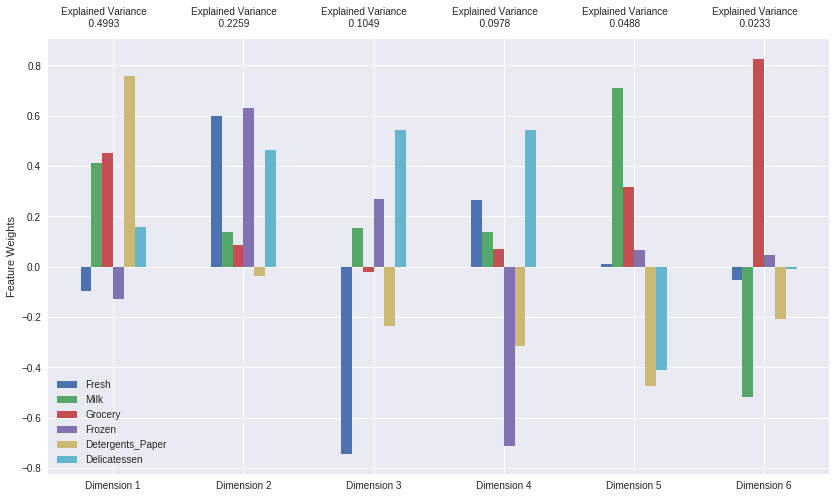

In [13]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

pca_results['Explained Variance'].cumsum()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

About 72.52% of the data is explained by the first and second principal components and 92.79% of the data is explained by the first to fourth principal components.

The first component which has a variance of 49.93% increases with the Milk, Grocery and Detergents_Paper features. Although the principal component has a weak negative correlation with two features (Fresh and Frozen), let's say we were to pick anything above eigenvalues above 0.4 as an important feature. On the otherhand it suggests Fresh and Frozen vary together. So if purcahsing power in one decreases, the other one tends to decreases as well. Milk, Grocery and Detergents_Paper features can be seen as important features and positively correlated with the first principal component. Suggesting that the more a customer buys a Milk product, that customer is likely to purchase more Groceries and Deptergents_Paper. We can observe the Detergents_Paper feature has the highest eigenvalue. Hence, the first principal component could be a measure for spending on Detergents_Paper products.

The second principal component had a variance of 22.59% which makes it the second highest. However on the graph, it seems all the products but one is negatively correlated with the principal component in the second dimension. The relevant features using my initial threshold of 0.4 are Fresh, Frozen and Delicatessen. The second principal component increases with these three features as those features increase. So this component can be viewed as a measure for the high spending on Fresh, Frozen and Delicatessen products. This also suggests that customers who spend more on Fresh products are likely to spend more on Frozen and Delicatessen products as well.

Looking at the third principal component with a variance of 10.49%, Delicatessen seems to be the only relevant feature. Delicatessen, with an eigenvalue above 0.4, I'd say is strongly correlated with the third principal component in the positive direction but the Fresh feature is more strongly correlated in the negative direction. Again, as the principal component in the 3rd dimension increases the spending on Frozen goods decreases and also the spending on Delicatessen increases. This suggests customers who are likely to spend less money on Frozen goods will likely purchase more Delicatessen products. This could be a measure of low spending behaviour on Fresh products.

Lastly, the fourth dimension has a principal component variance of 9.78%. As the dimension increases the less the variance in data points so this makes sense. Here we have a very strong positive correlation for Delicatessen products and the fourth principal component. So it could be said that the more Delicatessen prodcuts you buy, you may probably purchase some Fresh products too since that feature is a little above 0.2. On the negative side, we have strong correlation for Frozen products. As the purchase for Delicatessen products increases, the purchase for Frozen products may decrease as well for a particular customer. This could also be a measure for the low spending behaviour on Frozen products.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.4072,2.4079,0.5245,-0.0848,0.5462,-0.0377
1,2.3581,0.4961,-1.0638,2.0676,-0.0663,-0.3628
2,-0.4665,-0.0076,-0.2441,-1.7168,-0.0333,0.0682


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

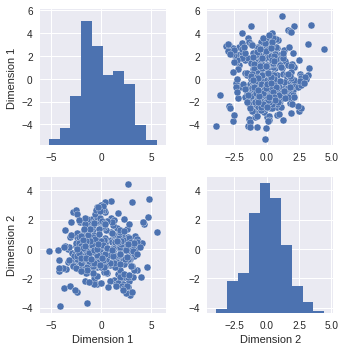

In [15]:
import seaborn as sns
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# scatter plot of rediced data
sns.pairplot(reduced_data, kind="scatter")

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.4072,2.4079
1,2.3581,0.4961
2,-0.4665,-0.0076


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

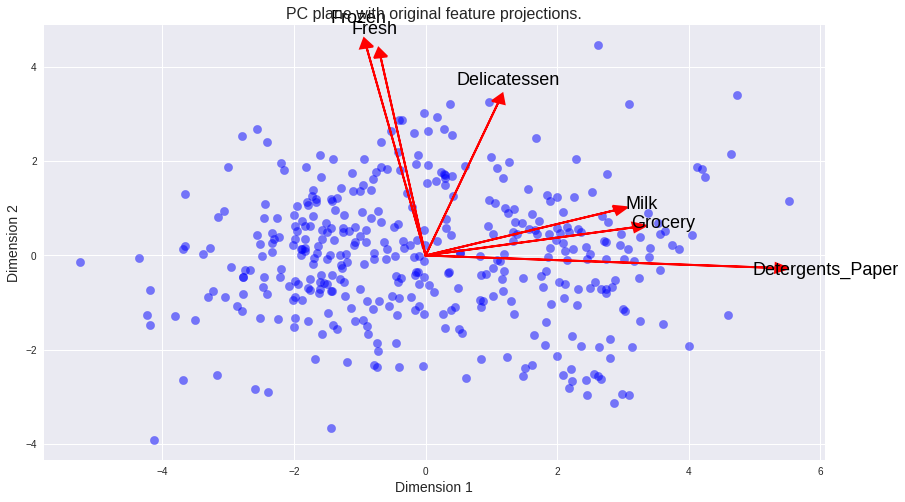

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

#### K-Means

K-Means clustering algorithm is very easy to implement. This categorises data points into `k` number of clusters with the help of a centroid. It is very efficient as it requires less computing power. It is very useful when you know the number of clusters your data points need to be categorised into. It is also very good with circular data.
On the otherhand it has some disadvantages. The first one being that it is very sensitive to outliers and noise. Non-circular data can be badly clustered. The other point is, it not easy to determine what `k` should be. So you would have to try a number of values of k, starting from 1 and onwards.


#### Gaussian Mixture Model Clustering

Gaussain Mixture Model clustering algorithm is more flexible compared to the K-Means algorithm. The reason being, Gaussian Mixture Model, lets call it GMM, is an extension of the K-Means algorithm. K-Means clusters data points using the mean distance of a point away from a centroid so a data point gets assigned only to the cluster closest to it. GMM not only relies on the mean but also the covariance and the probability that a data point will belong to  a certain cluster, making it more flexible. GMM accomodates overlapping clusters as certain data points could belong to two or more cluster. For instance, a restaurant could purchase some prodcuts that are also purchased by cafes.


#### CHOSEN ALGORITHM: GAUSSIAN MIXTURE MODEL

I forsee the customers of the dataset overlapping since some may have similar purchasing behaviour so a very flexible algorithm that is good for different shapes of data will be needed. That's why its a mixture model and fastest algorithm for learning mixture models.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# clusters = [2,3,4,5,6,7]
clusters = [2]

for num in clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=num, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print("GMM for {} clusters had a score of {}".format(num, score))

GMM for 2 clusters had a score of 0.4474119955709115


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

| Cluster No. | Silhouette Score |
|------|------|
|   2  | 0.4474|
|   3  | 0.3611|
|   4  | 0.3182|
|   5  | 0.3130|
|   6  | 0.3406|
|   7  | 0.3296|

Above are the Silhouette scores with respect to each number of cluster. Of all rthe cluster numbers, a cluster of 2 had the best score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

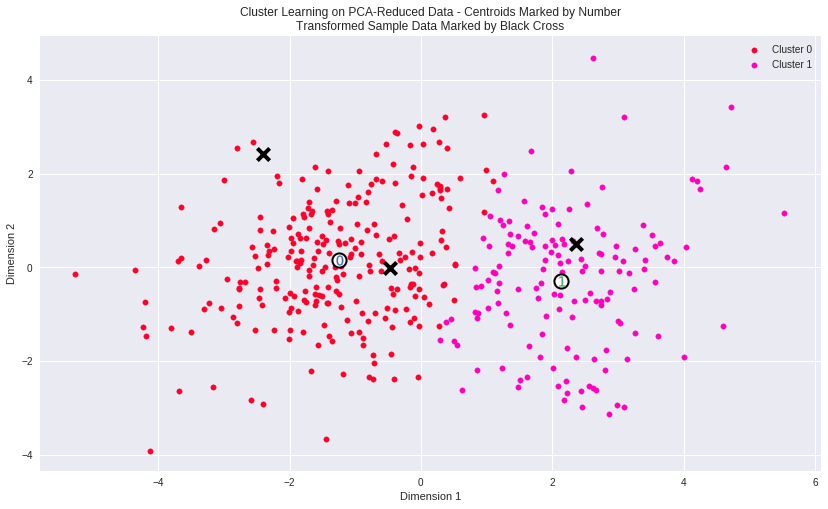

In [22]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9468.0,2067.0,2624.0,2196.0,343.0,799.0
Segment 1,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0


In [24]:
display(np.exp(good_data).describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.00000
mean,12430.630653,5486.314070,7504.907035,3028.809045,2725.376884,1454.71608
std,12552.698266,6410.878177,9263.803670,3712.563636,4644.023066,1746.45365
min,255.000000,201.000000,223.000000,91.000000,5.000000,46.00000
25%,4043.500000,1597.250000,2125.000000,830.000000,263.250000,448.25000
50%,9108.000000,3611.500000,4573.000000,1729.500000,788.000000,997.50000
75%,16969.000000,6802.500000,9762.250000,3745.000000,3660.500000,1830.00000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.00000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0 seems to be customers who focus spending more on fresh products more like to be a market. I believe it is a market that is not static so this customer spends less on Detergents_Paper. It also spends quite an amount on Frozen products. It could be a customer that markets fresh frozen foods, maybe sea foods. All the other categories fell below the median mark so these could be complementary goods to the market seller. Hence the market seller will only purchase them according to the demand. That could be a reason why those products are not purchased like Fresh  and Frozen products.

Segment 1 seems to be customers who purchase a lot of products at a time in bulk to resell it to retail merchants. Fresh and Frozen products are below the 50th percentile suggesting the customers focus is on proccessed prodcuts like milk, delis and the likes.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)



Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Text(0.5,1,"Rank percentiles of\nsamples' prodcut category spending")

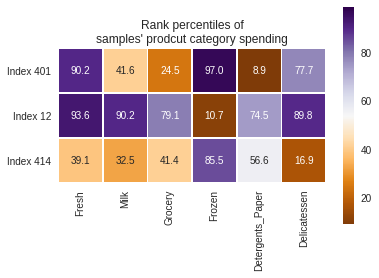

In [37]:
pct_ranks = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

sns.heatmap(pct_ranks, annot=True, linewidth=.5, vmax=99, fmt='.1f', cmap='PuOr', square=True, cbar=True)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(ha='center')
plt.title('Rank percentiles of\nsamples\' prodcut category spending')

**Answer:**

First and Third samples have been predicted to be in segement 0 and second sampple predicted to be in segment 1. This is very consistent with our conclusion earlier on that customers in segment 0 focus more on fresh and frozen products or either one of them. It can be seen that the first sample has a high percentiles in Frozen and Fresh which qualifies that cusotmer to be in segment 0. The third sample on the otherhand purchased less Fresh products but more Frozen products and also less of all the other products. So it still makes sense to categorise this customer into segment 0. So my initial guess at the outset was okay.

The second sample has been categorised into segement 1. Earlier on we concluded that those in segment 1 focused all the product categories in differrent and large quantities. We can observe a similar behaviour from the second sample. And I was clearly wrong on my intial guess at the outset.

To conclude, our predictions are very consistent. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

So we could ask a couple of questions. Who are your customers and what type of products do they purchase? With regards to the customers in segment 0, they are customers who focus on fresh and frozen products, which means they constantly need supply on a daily basis. Now imagine cutting off that supply, from 5 times a week to 3 times a week. That would clearly make the foods not so fresh anymore since they will be kept for longer periods before delivered. Customers in segment 0 will not react positively to this change.

On the otherhand, customers in segment 1 will not be really affected by this new change. The reason is that, they do not really have a product category they focus on. They purchase a little bit of everything in bulk and can handle deliveries 3 times a week since they would have enough to go about their businesses with.
So one group of customers will respond positively and the other negatively but are clearly speculative.

So with regards to A/B testing with have two variants. One is to deliver products 5 times a week and the other is to deliver 3 times a week. So a decision is rolled out, the compnay will have to ask its customer base which variant is preferred and have them vote.

Until the A/B test is done, we can't really be sure. The only thing we can be really sure of is that the change will not affect all customer eqaully.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

From our dataset we have been able to cluster 398 customers into two segments, segment 0 and segment 1. We could simply use the trained GMM that gave us two clusters as the best, to label all the customers in our data to generate new data with labels (that is either a customer belongs to segment 0 or segment 1). SO this new data has a new column or feature named label and that will act as our target variable in the supervised learning process. After this new data with labels from our customer segment data has been trained, it can be used to predict where the new customers belong. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

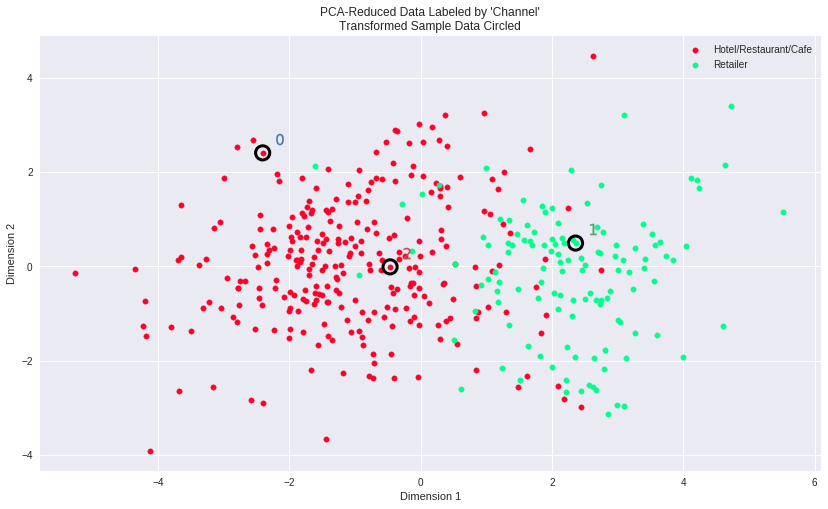

In [38]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

I'm very surprised as to how very close my initial predictions were. Although I predicted sample 0 and sample 2 to be frozen and fresh food sellers like sea food sellers, I'm just glad they still fell in the cluster that fits their spending behaviour. So thinking about it yeah I guess they could be hotels, restaurants and cafes. Sample 1 too fell in its right place as a reatiler as I predicted. None of my sample points were misclassified and the GMM mdel predicted the number of cluster to be 2 correctly.

Some customers could be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes'. But some customer overlap into other segments as can be observed above. 

On the whole, I'd say these classifications are very consistent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.